In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers
import keras

%matplotlib inline


In [2]:
audio_data = []
labels = []
sampling_rate = []
file_names = []


In [3]:
#samplerate, data = wavfile.read("dataset/dog/1-30344-A.wav")
data, samplerate = librosa.load("dataset/001 - Dog bark/1-30226-A.ogg", sr=44000) # Downsample 44.1kHz to 8kHz

print(data.shape)
print(samplerate)


(220044,)
44000


In [4]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:
    
    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

5.001
2.272727272727273e-05
176000.0


# Getting and labeling the data

In [5]:
classes = []
label_number=0
audio_data = []
labels = []
sampling_rate = []
file_names = []
data = []
noisy_removed=[]
noise=[]
for filepath in glob.iglob('dataset/*'):
    
    #print(filepath[9:])
    
    #print(filepath)
    classes.append(filepath[8:])

print(classes)

for i in classes:
    print("the class = "+i+", the label = "+str(label_number))
    for j in glob.iglob('dataset/'+i+'/*'):
        #samplerate, data = wavfile.read(j)
        y, s = librosa.load(j, sr=44000) # Downsample 44.1kHz to 8kHz
        #reduced_noise = nr.reduce_noise(audio_clip=y, noise_clip=y, verbose=False)
        #print(s)
        #print(j)
        data.append([y,label_number])
        #noise.append(y)
        #labels.append(label_number)
        
    label_number = label_number + 1
print(len(labels))
#print(labels)



['001 - Dog bark', '002 - Rain', '003 - Sea waves', '004 - Baby cry', '005 - Clock tick', '006 - Person sneeze', '007 - Helicopter', '008 - Chainsaw', '009 - Rooster', '010 - Fire crackling']
the class = 001 - Dog bark, the label = 0
the class = 002 - Rain, the label = 1
the class = 003 - Sea waves, the label = 2
the class = 004 - Baby cry, the label = 3
the class = 005 - Clock tick, the label = 4
the class = 006 - Person sneeze, the label = 5
the class = 007 - Helicopter, the label = 6
the class = 008 - Chainsaw, the label = 7
the class = 009 - Rooster, the label = 8
the class = 010 - Fire crackling, the label = 9
0


In [6]:
data[0]

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 0]

# Shuffle the data

In [7]:
import random

random.shuffle(data)
audio_data=[]
labels=[]
for i,j in data:
    audio_data.append(i)
    labels.append(j)
    


In [8]:
print(labels[0])

5


# Randomly select the data and producing mfcc spectogram

In [9]:
example = random.randint(0,400)
print(example)
mfcc = librosa.feature.mfcc(y=audio_data[example])
print(mfcc.shape)
print(labels[example])

236
(20, 430)
3


In [10]:
mfcc[0]

array([-502.38995 , -504.98056 , -509.505   , -513.6253  , -518.00916 ,
       -511.5718  , -436.89908 , -345.6579  , -285.4577  , -255.55966 ,
       -247.719   , -256.63303 , -282.5126  , -340.02142 , -412.90717 ,
       -474.8361  , -497.90018 , -416.39423 , -282.1256  , -209.55008 ,
       -181.22708 , -179.41444 , -196.66498 , -214.14792 , -211.10335 ,
       -207.15228 , -212.06291 , -231.16626 , -238.7201  , -202.10371 ,
       -180.28941 , -180.14868 , -186.41483 , -196.42924 , -209.39952 ,
       -218.12906 , -199.68085 , -194.01212 , -196.4695  , -214.45093 ,
       -216.56541 , -206.90102 , -210.6998  , -212.39824 , -219.25562 ,
       -240.0864  , -217.67088 , -193.14122 , -176.81644 , -176.53838 ,
       -184.99754 , -180.89883 , -195.78793 , -194.632   , -185.44537 ,
       -187.76395 , -186.89845 , -185.39369 , -185.14711 , -201.97255 ,
       -211.70334 , -208.01378 , -208.39987 , -206.45126 , -209.28746 ,
       -205.9827  , -202.75238 , -188.90164 , -177.2369  , -177.

In [11]:
example

236

In [12]:
labels[example]

3

Text(0.5, 1.0, 'Mel Frequency Cepstral Coefficient of label3')

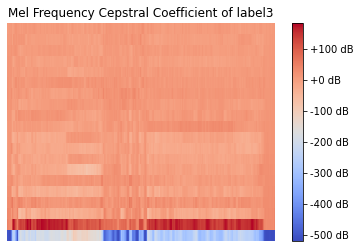

In [13]:

save_path = 'Rooster.jpg'

plt.axis('off') # no axis
librosa.display.specshow(mfcc)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Frequency Cepstral Coefficient of label'+str(labels[example]))
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()

# Getting all mfcc Features and take the data in a sample lenght and producing single row

In [14]:
mfcc = []
for i in range (0,400):
    if i%100 == 0:
        print(i)
    mf = librosa.feature.mfcc(y=audio_data[i])
    
    mf=mf.reshape(-1,1)
    if mf.shape[0] == 6280:
        labels.pop(i)
        continue
    else:
        mfcc.append(mf[:8540])
        
    if mf.shape[0]<8600:
        print(mf.shape)
    
mfcc =np.array(mfcc) 
mfcc.shape

0
(8580, 1)
(8580, 1)
(8540, 1)
100
(8540, 1)
(8580, 1)
(8540, 1)
(8540, 1)
200
300
(8580, 1)


(399, 8540, 1)

In [15]:
mfcc=mfcc.reshape(399,-1)
mfcc.shape

(399, 8540)

# Scaling on mfcc features

In [16]:
from sklearn.preprocessing import MinMaxScaler
data = mfcc
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)


print(np.amax(mfcc))

normalized_features = scaler.transform(data)
print(np.amax(normalized_features))

303.66687
1.0000001


# Decision Tree

In [17]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.20, random_state=100)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.3875


# Sequential model

In [19]:
features_convolution = np.reshape(normalized_features,(399,20, -1,1))

In [20]:
features_convolution.shape

(399, 20, 427, 1)

In [21]:
y=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')


In [22]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dropout(0.2))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history = model.fit(features_convolution, y,batch_size=16, epochs=80,validation_split=0.2)

Epoch 1/80
20/20 [==============================] - 8s 401ms/step - loss: 4.5568 - accuracy: 0.0815 - val_loss: 2.3018 - val_accuracy: 0.1750
Epoch 2/80
20/20 [==============================] - 9s 438ms/step - loss: 5.6866 - accuracy: 0.1254 - val_loss: 2.2788 - val_accuracy: 0.1500
Epoch 3/80
20/20 [==============================] - 9s 460ms/step - loss: 4.5130 - accuracy: 0.2006 - val_loss: 2.0709 - val_accuracy: 0.2625
Epoch 4/80
20/20 [==============================] - 10s 511ms/step - loss: 4.4176 - accuracy: 0.3386 - val_loss: 1.7734 - val_accuracy: 0.3375
Epoch 5/80
20/20 [==============================] - 12s 594ms/step - loss: 4.3009 - accuracy: 0.3605 - val_loss: 1.5652 - val_accuracy: 0.4250
Epoch 6/80
20/20 [==============================] - 11s 536ms/step - loss: 3.7121 - accuracy: 0.4828 - val_loss: 1.3114 - val_accuracy: 0.5375
Epoch 7/80
20/20 [==============================] - 11s 541ms/step - loss: 4.2092 - accuracy: 0.4734 - val_loss: 1.2757 - val_accuracy: 0.4875
Ep

Epoch 58/80
20/20 [==============================] - 10s 496ms/step - loss: 3.1483 - accuracy: 0.8056 - val_loss: 1.1542 - val_accuracy: 0.7625
Epoch 59/80
20/20 [==============================] - 10s 503ms/step - loss: 3.0433 - accuracy: 0.8119 - val_loss: 1.2395 - val_accuracy: 0.7000
Epoch 60/80
20/20 [==============================] - 10s 482ms/step - loss: 3.2400 - accuracy: 0.7994 - val_loss: 1.1506 - val_accuracy: 0.7000
Epoch 61/80
20/20 [==============================] - 10s 482ms/step - loss: 3.1371 - accuracy: 0.8056 - val_loss: 1.1683 - val_accuracy: 0.7625
Epoch 62/80
20/20 [==============================] - 9s 474ms/step - loss: 3.3387 - accuracy: 0.7931 - val_loss: 1.2842 - val_accuracy: 0.7000
Epoch 63/80
20/20 [==============================] - 10s 487ms/step - loss: 3.0850 - accuracy: 0.8088 - val_loss: 1.1881 - val_accuracy: 0.7500
Epoch 64/80
20/20 [==============================] - 10s 486ms/step - loss: 3.9948 - accuracy: 0.7524 - val_loss: 1.2378 - val_accuracy: 

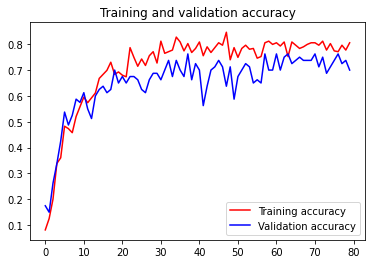

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# ICA 

In [25]:
from sklearn.decomposition import FastICA

In [26]:
X = mfcc
ica = FastICA(n_components = 10)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


C:\Users\Talha Khan\anaconda3\envs\tensorflow\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [27]:
from sklearn.preprocessing import MinMaxScaler
data = np.dot(S_,A_.T)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)


print(np.amax(data))

normalized_ica_features = scaler.transform(data)
print(np.amax(normalized_ica_features))

409.2430335489787
1.0000000000000002


# Sequential model on Ica Features

In [28]:
data.shape

(399, 8540)

In [29]:
features_convolution = np.reshape(normalized_ica_features,(399,20, -1,1))

In [30]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dropout(0.2))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
history = model.fit(features_convolution, y,batch_size=16, epochs=40,validation_split=0.2)

Epoch 1/40
20/20 [==============================] - 11s 541ms/step - loss: 5.3831 - accuracy: 0.0909 - val_loss: 2.2956 - val_accuracy: 0.1375
Epoch 2/40
20/20 [==============================] - 15s 742ms/step - loss: 4.4200 - accuracy: 0.1755 - val_loss: 2.1999 - val_accuracy: 0.2750
Epoch 3/40
20/20 [==============================] - 14s 682ms/step - loss: 5.2791 - accuracy: 0.2539 - val_loss: 1.9553 - val_accuracy: 0.2500
Epoch 4/40
20/20 [==============================] - 10s 492ms/step - loss: 4.1991 - accuracy: 0.3072 - val_loss: 1.5563 - val_accuracy: 0.4500
Epoch 5/40
20/20 [==============================] - 14s 683ms/step - loss: 4.0601 - accuracy: 0.3950 - val_loss: 1.4595 - val_accuracy: 0.3875
Epoch 6/40
20/20 [==============================] - 12s 586ms/step - loss: 4.0593 - accuracy: 0.4169 - val_loss: 1.4376 - val_accuracy: 0.4375
Epoch 7/40
20/20 [==============================] - 12s 607ms/step - loss: 4.2287 - accuracy: 0.4734 - val_loss: 1.3456 - val_accuracy: 0.4875

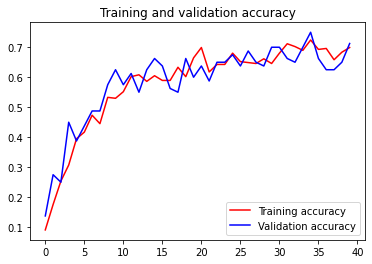

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [132]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dropout(0.2))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [133]:
history = model.fit(features_convolution, y,batch_size=16, epochs=80,validation_split=0.2)

Epoch 1/80
20/20 [==============================] - 8s 419ms/step - loss: 4.9087 - accuracy: 0.1254 - val_loss: 2.2975 - val_accuracy: 0.1000
Epoch 2/80
20/20 [==============================] - 9s 439ms/step - loss: 5.2677 - accuracy: 0.1317 - val_loss: 2.2250 - val_accuracy: 0.2125
Epoch 3/80
20/20 [==============================] - 10s 485ms/step - loss: 4.5413 - accuracy: 0.1850 - val_loss: 2.0757 - val_accuracy: 0.1750
Epoch 4/80
20/20 [==============================] - 10s 508ms/step - loss: 4.7527 - accuracy: 0.2069 - val_loss: 2.1372 - val_accuracy: 0.2000
Epoch 5/80
20/20 [==============================] - 10s 512ms/step - loss: 4.3102 - accuracy: 0.2696 - val_loss: 1.9822 - val_accuracy: 0.2125
Epoch 6/80
20/20 [==============================] - 10s 505ms/step - loss: 4.4705 - accuracy: 0.2853 - val_loss: 2.0391 - val_accuracy: 0.2125
Epoch 7/80
20/20 [==============================] - 9s 464ms/step - loss: 4.4180 - accuracy: 0.3417 - val_loss: 1.7247 - val_accuracy: 0.4000
Ep

Epoch 58/80
20/20 [==============================] - 11s 536ms/step - loss: 3.4803 - accuracy: 0.7367 - val_loss: 0.9927 - val_accuracy: 0.7000
Epoch 59/80
20/20 [==============================] - 11s 534ms/step - loss: 2.9468 - accuracy: 0.7837 - val_loss: 0.8214 - val_accuracy: 0.7500
Epoch 60/80
20/20 [==============================] - 10s 517ms/step - loss: 3.8439 - accuracy: 0.7461 - val_loss: 1.0000 - val_accuracy: 0.7000
Epoch 61/80
20/20 [==============================] - 10s 514ms/step - loss: 3.4181 - accuracy: 0.7680 - val_loss: 0.9909 - val_accuracy: 0.7500
Epoch 62/80
20/20 [==============================] - 12s 586ms/step - loss: 2.8953 - accuracy: 0.7962 - val_loss: 0.9558 - val_accuracy: 0.7000
Epoch 63/80
20/20 [==============================] - 10s 512ms/step - loss: 3.8255 - accuracy: 0.7398 - val_loss: 0.8607 - val_accuracy: 0.7000
Epoch 64/80
20/20 [==============================] - 13s 633ms/step - loss: 2.6621 - accuracy: 0.8119 - val_loss: 0.8442 - val_accuracy:

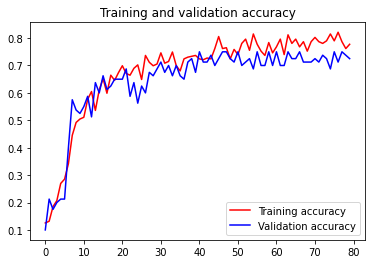

<Figure size 432x288 with 0 Axes>

In [134]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [109]:
X = mfcc
ica = FastICA(n_components = 100)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


In [110]:
from sklearn.preprocessing import MinMaxScaler
data = np.dot(S_,A_.T)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)


print(np.amax(data))

normalized_ica_features = scaler.transform(data)
print(np.amax(normalized_ica_features))

516.1238054950188
1.0000000000000002


In [111]:
features_convolution = np.reshape(normalized_ica_features,(399,20, -1,1))

In [145]:

model2 = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
model.add(Activation('softsign'))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dropout(0.2))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [113]:

history = model2.fit(features_convolution, y,batch_size=16, epochs=80,validation_split=0.2)

Epoch 1/80
20/20 [==============================] - 10s 509ms/step - loss: 5.0237 - accuracy: 0.1097 - val_loss: 2.2817 - val_accuracy: 0.1000
Epoch 2/80
20/20 [==============================] - 11s 546ms/step - loss: 4.5971 - accuracy: 0.1317 - val_loss: 2.2105 - val_accuracy: 0.1500
Epoch 3/80
20/20 [==============================] - 11s 562ms/step - loss: 5.3972 - accuracy: 0.1630 - val_loss: 2.1618 - val_accuracy: 0.1125
Epoch 4/80
20/20 [==============================] - 11s 574ms/step - loss: 4.7664 - accuracy: 0.2038 - val_loss: 2.1103 - val_accuracy: 0.1500
Epoch 5/80
20/20 [==============================] - 12s 581ms/step - loss: 4.7146 - accuracy: 0.2633 - val_loss: 1.9158 - val_accuracy: 0.3375
Epoch 6/80
20/20 [==============================] - 12s 595ms/step - loss: 4.3527 - accuracy: 0.3323 - val_loss: 1.8128 - val_accuracy: 0.3750
Epoch 7/80
20/20 [==============================] - 12s 594ms/step - loss: 4.5099 - accuracy: 0.3887 - val_loss: 1.5276 - val_accuracy: 0.3750

Epoch 58/80
20/20 [==============================] - 24s 1s/step - loss: 3.7666 - accuracy: 0.7335 - val_loss: 1.2935 - val_accuracy: 0.6750
Epoch 59/80
20/20 [==============================] - 15s 772ms/step - loss: 3.3983 - accuracy: 0.7743 - val_loss: 1.2930 - val_accuracy: 0.7000
Epoch 60/80
20/20 [==============================] - 15s 726ms/step - loss: 3.1766 - accuracy: 0.7962 - val_loss: 1.3360 - val_accuracy: 0.7125
Epoch 61/80
20/20 [==============================] - 15s 760ms/step - loss: 3.6883 - accuracy: 0.7492 - val_loss: 1.2920 - val_accuracy: 0.7125
Epoch 62/80
20/20 [==============================] - 19s 965ms/step - loss: 2.8880 - accuracy: 0.8025 - val_loss: 1.2237 - val_accuracy: 0.7375
Epoch 63/80
20/20 [==============================] - 16s 807ms/step - loss: 2.8073 - accuracy: 0.8213 - val_loss: 1.3287 - val_accuracy: 0.7000
Epoch 64/80
20/20 [==============================] - 14s 713ms/step - loss: 3.1966 - accuracy: 0.8025 - val_loss: 1.5496 - val_accuracy: 0.

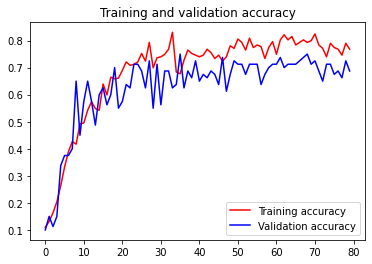

<Figure size 432x288 with 0 Axes>

In [114]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [123]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
sum_of_error = 0
for i,j in zip(acc,val_acc):
    sum_of_error += j - i

In [124]:
sum_of_error

-4.508072257041931

In [146]:
model.save('saved_model/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [158]:
import pandas as pd
df = pd.DataFrame(labels)
df.to_csv('labels.csv')

In [147]:
new_model = tf.keras.models.load_model('saved_model/my_model')